In [2]:
import time
from pylab import *
import matplotlib.gridspec as gridspec

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [3]:
import time
from pylab import *
import matplotlib.gridspec as gridspec
import numpy as np
#construct background states, observations with error

def x_to_y(X): # averaging in 2*2 windows (4 pixels)
    dim = X.shape[0]
    dim = 20
    Y = np.zeros((int(dim/2),int(dim/2)))
    for i in range(int(dim/2)):
        for j in range(int(dim/2)):
            Y[i,j] = X[2*i,2*j] + X[2*i+1,2*j] + X[2*i,2*j+1] + X[2*i+1,2*j+1]

            Y_noise = np.random.multivariate_normal(np.zeros(100),0.0000 * np.eye(100))
            Y_noise.shape = (10,10)
            Y = Y + Y_noise
    return Y


class shallow(object):


    time = 0

    plt = []
    fig = []


    def __init__(self, x=[],y=[],h_ini = 1.,u=[],v = [],dx=0.01,dt=0.0001, N=64,L=1., px=16, py=16, R=64, Hp=0.1, g=1., b=0.): # How define no default argument before?


        # add a perturbation in pressure surface


        self.px, self.py = px, py
        self.R = R
        self.Hp = Hp



        # Physical parameters

        self.g = g
        self.b = b
        self.L=L
        self.N=N

        # limits for h,u,v


        #self.dx =  self.L / self.N # a changer
        #self.dt = self.dx / 100.
        self.dx=dx
        self.dt=dt

        self.x,self.y = mgrid[:self.N,:self.N]

        self.u=zeros((self.N,self.N))
        self.v=zeros((self.N,self.N))

        self.h_ini=h_ini

        self.h=self.h_ini * ones((self.N,self.N))

        rr = (self.x-px)**2 + (self.y-py)**2
        self.h[rr<R] = self.h_ini + Hp #set initial conditions

        self.lims = [(self.h_ini-self.Hp,self.h_ini+self.Hp),(-0.02,0.02),(-0.02,0.02)]



    def dxy(self, A, axis=0):
        """
        Compute derivative of array A using balanced finite differences
        Axis specifies direction of spatial derivative (d/dx or d/dy)
        dA[i]/dx =  (A[i+1] - A[i-1] )  / 2dx
        """
        return (roll(A, -1, axis) - roll(A, 1, axis)) / (self.dx*2.) # roll: shift the array axis=0 shift the horizontal axis

    def d_dx(self, A):
        return self.dxy(A,1)

    def d_dy(self, A):
        return self.dxy(A,0)


    def d_dt(self, h, u, v):
        """
        http://en.wikipedia.org/wiki/Shallow_water_equations#Non-conservative_form
        """
        for x in [h, u, v]: # type check
           assert isinstance(x, ndarray) and not isinstance(x, matrix)

        g,b,dx = self.g, self.b, self.dx

        du_dt = -g*self.d_dx(h) - b*u
        dv_dt = -g*self.d_dy(h) - b*v

        H = 0 #h.mean() - our definition of h includes this term
        dh_dt = -self.d_dx(u * (H+h)) - self.d_dy(v * (H+h))

        return dh_dt, du_dt, dv_dt


    def evolve(self):
        """
        Evolve state (h, u, v) forward in time using simple Euler method
        x_{N+1} = x_{N} +   dx/dt * d_t
        """

        dh_dt, du_dt, dv_dt = self.d_dt(self.h, self.u, self.v)
        dt = self.dt

        self.h += dh_dt * dt
        self.u += du_dt * dt
        self.v += dv_dt * dt
        self.time += dt

        return self.h, self.u, self.v





time 0.000100


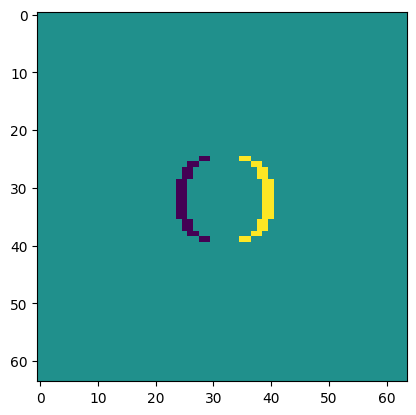

0
time 0.005100


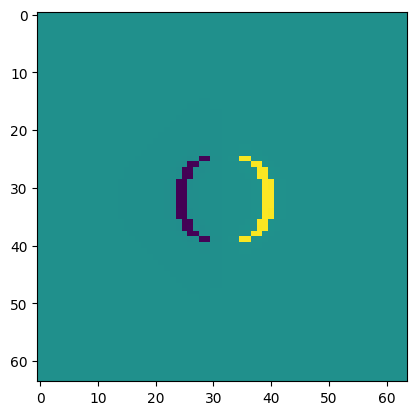

1
time 0.010100


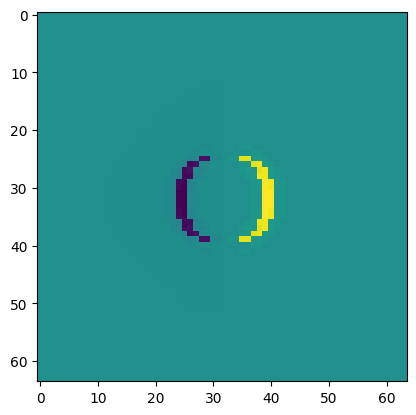

2
time 0.015100


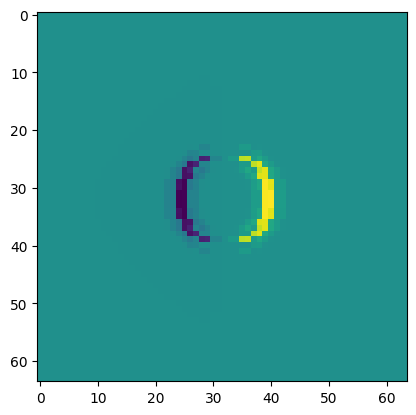

3
time 0.020100


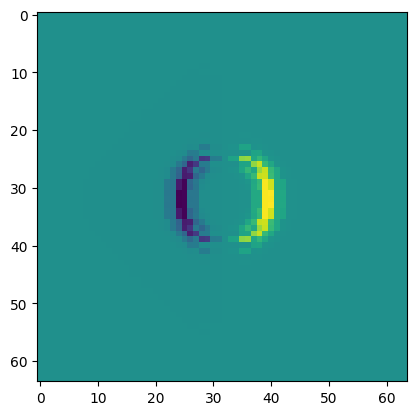

4
time 0.025100


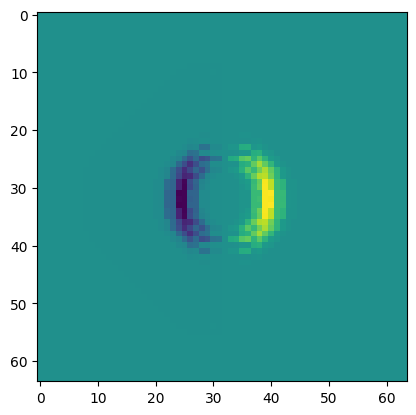

5
time 0.030100


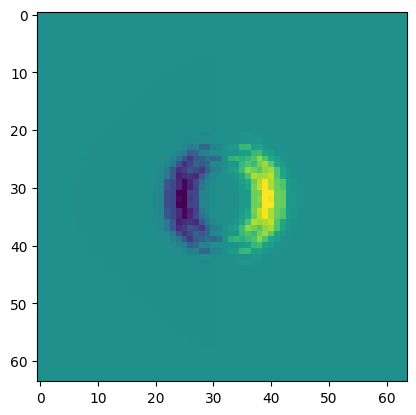

6
time 0.035100


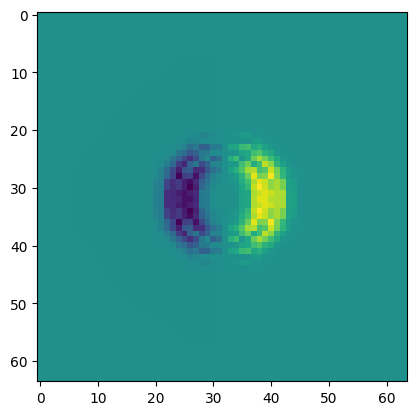

7
time 0.040100


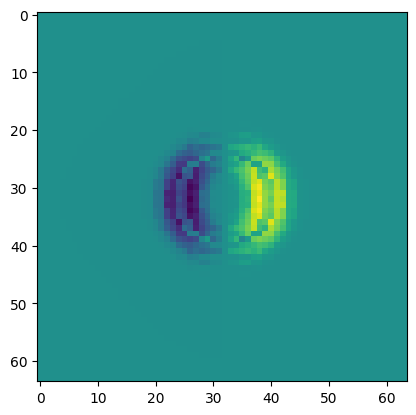

8
time 0.045100


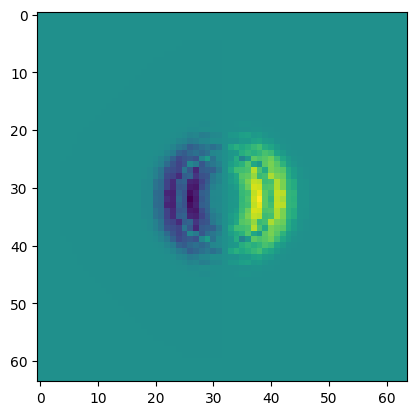

9
time 0.050100


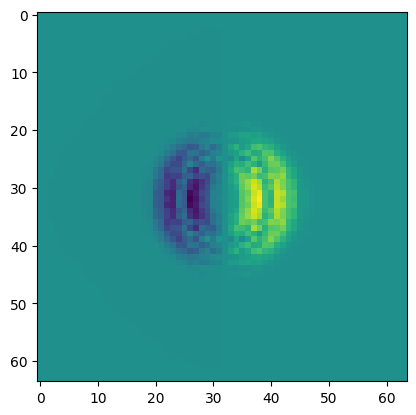

10
time 0.055100


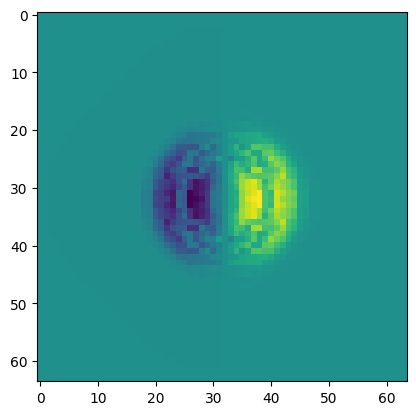

11
time 0.060100


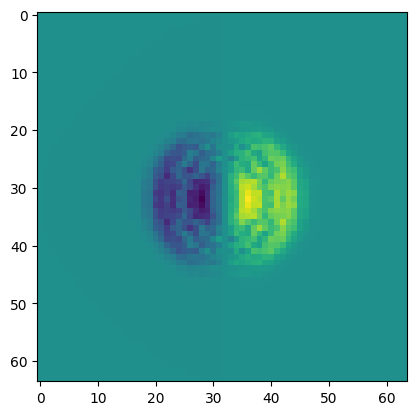

12
time 0.065100


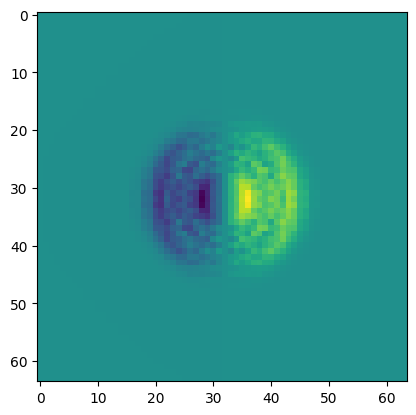

13
time 0.070100


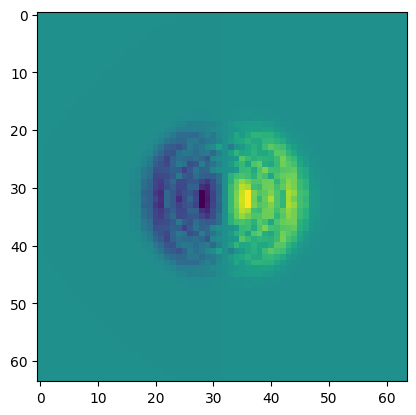

14
time 0.075100


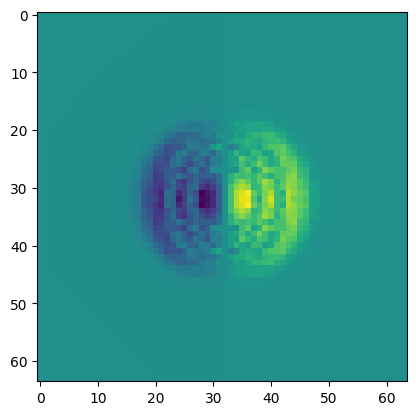

15
time 0.080100


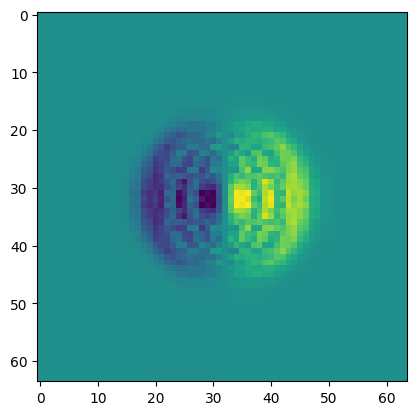

16
time 0.085100


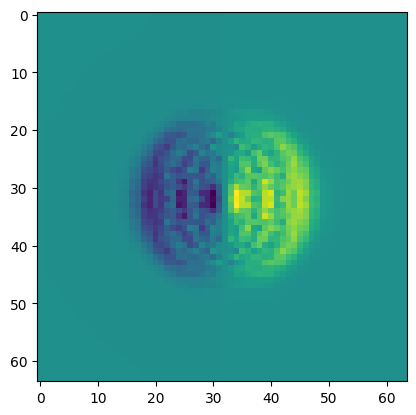

17
time 0.090100


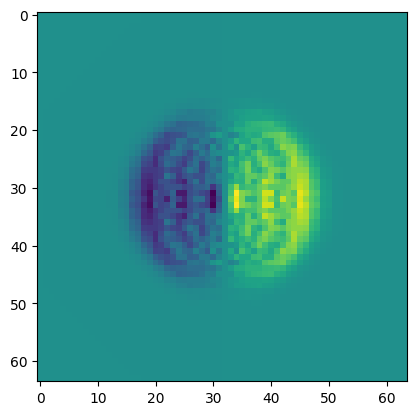

18
time 0.095100


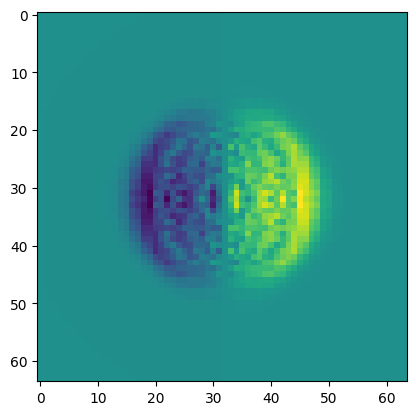

19


<Figure size 640x480 with 0 Axes>

In [4]:
iteration_times= 1000

SW = shallow(N=64,px=32,py=32,R=64.,Hp=0.1,b=0.2)
# chose a point (x,y) to check the evolution
x=10
y=10

#true_u_vect = np.zeros((160,64,64))

#vor_u_vect = np.zeros((160,64,64))

index = 0

#SW.plot()
u_vect=np.zeros(iteration_times)
v_vect=np.zeros(iteration_times)
h_vect=np.zeros(iteration_times)
for i in range(iteration_times):
    SW.evolve()
    u_vect[i]=SW.u[x][y]
    v_vect[i]=SW.v[x][y]
    h_vect[i]=SW.h[x][y]
    #SW.animate()
    if i % 50 == 0:
        print ('time %f'%SW.time)
        plt.imshow(SW.u)
        plt.show()
        plt.close()
        print(index)
        #true_u_vect[index,:,:] = SW.u
        index += 1

gs = gridspec.GridSpec(2, 2,
                width_ratios=[1, 1],
                height_ratios=[1, 1]
                )

fig = plt.figure()

#fig = plt.figure()
t=SW.time




u_t = SW.u
v_t = SW.v


In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Define your shallow function and other necessary components here

# Function to run the simulation for a given number of iterations and save the velocity field plot
def run_and_save_simulation(px, py, R, Hp, b, num_iterations, sim):
    SW = shallow(N=64, px=px, py=py, R=R, Hp=Hp, b=b)
    x, y = random.randint(0, 63), random.randint(0, 63)  # Random point (x, y)
    u_vect = np.zeros(num_iterations)
    v_vect = np.zeros(num_iterations)
    h_vect = np.zeros(num_iterations)
    count = 0
    for i in range(num_iterations):
        SW.evolve()
        u_vect[i] = SW.u[x][y]
        v_vect[i] = SW.v[x][y]
        h_vect[i] = SW.h[x][y]
        if i % 50 == 0:
            plt.imshow(SW.u)
            plt.savefig(f"horizontal_velocity_{sim}_{count}.png")
            count += 1
            plt.close()  # Close the plot to free up memory

# Run 1000 simulations
num_simulations = 500
iteration_times = 1000
sim = 0
for _ in range(num_simulations):
    px = random.randint(27, 37) * 1.0
    py = random.randint(27, 37) * 1.0
    R = random.randint(40, 80) * 1.0
    Hp = random.randint(5, 20) * 0.01
    b = random.randint(1, 100) * 0.1

    run_and_save_simulation(px, py, R, Hp, b, iteration_times, sim)
    sim += 1  # Increment simulation count after each simulation
